# Lotka-Volterra: observables and joint score

In [1]:
import numpy as np
import corner
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import corner

In [7]:
x = np.load('../../data/samples/lotkavolterra/x_pilot.npy')
# t_xz = np.load('../../data/samples/lotkavolterra/t_xz_pilot.npy')

In [16]:
def invert_original_trf(x_in):
    x_out = np.copy(x_in)
    
    means = [90.0, 46.5, 8.45, 7.74, 0.979, 0.936, 0.970, 0.912, 0.101]
    stds = [21., 58., 0.60, 0.77, 0.0087, 0.021, 0.013, 0.023, 0.17]

    for i, (x_, mean, std) in enumerate(zip(x_in.T, means, stds)):
        x_out[:, i] = std * x_ + mean
        
        print(x_in[::50,i] , '->', x_out[::50,i])
        
    return x_out

In [17]:
x = invert_original_trf(x)

print(x)

[ -3.03532009  -4.05676443  -3.33459477  -3.4295175   15.77010407
  -3.32292652  -2.10690634 460.34626301  -4.15641753 202.12425102
  -3.52570167   1.88142542  -3.42573321  -2.38915169  -1.84610533
  -2.90066225  -3.8748029   -1.1649322   -3.73636077  -4.21854305] -> [2.62582781e+01 4.80794702e+00 1.99735099e+01 1.79801325e+01
 4.21172185e+02 2.02185430e+01 4.57549669e+01 9.75727152e+03
 2.71523179e+00 4.33460927e+03 1.59602649e+01 1.29509934e+02
 1.80596026e+01 3.98278146e+01 5.12317881e+01 2.90860927e+01
 8.62913907e+00 6.55364238e+01 1.15364238e+01 1.41059603e+00]
[-0.79030601 -0.78265586 -0.79030601 -0.79030601 -0.79030601 -0.79030601
 -0.79030601 -0.79030601 -0.78984928 -0.79030601 -0.79030601 -0.79030601
 -0.79030601 -0.79030601 -0.79030601 -0.79030601 -0.79030601 -0.79030601
 -0.79030601 -0.79030601] -> [0.66225166 1.10596026 0.66225166 0.66225166 0.66225166 0.66225166
 0.66225166 0.66225166 0.68874172 0.66225166 0.66225166 0.66225166
 0.66225166 0.66225166 0.66225166 0.66225166

## Observables

In [18]:
print('means =', np.mean(x, axis=0))
print('stds =', np.std(x, axis=0))

means = [7.05559643e+02 3.97849297e+01 7.34776178e+00 4.51226290e+00
 8.33611704e-01 7.38606619e-01 1.38464173e-01 7.72252462e-02
 6.52340705e-02]
stds = [2.90599684e+03 5.31219626e+02 3.54734035e+00 1.31554388e+00
 1.88679522e-01 2.54926902e-01 2.71919076e-01 2.00932294e-01
 3.55916090e-01]


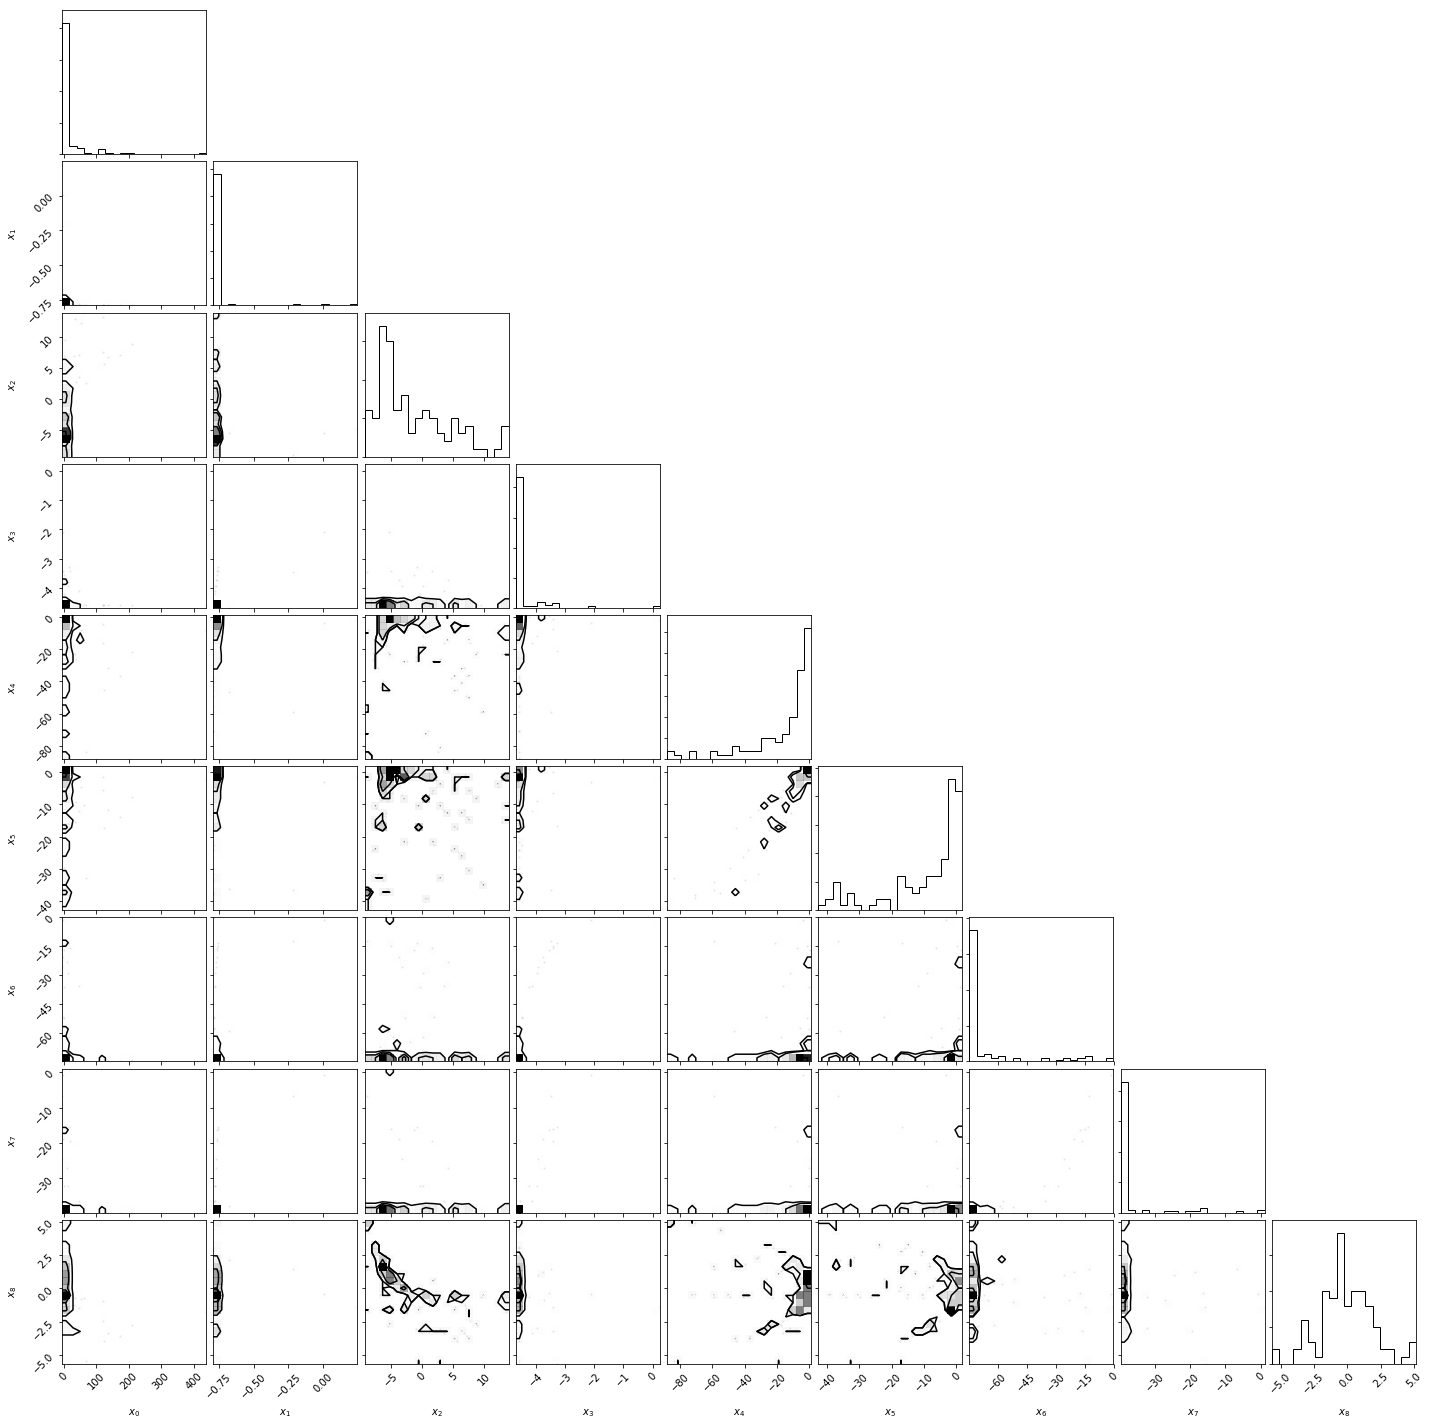

In [62]:
labels=[r'$x_' + str(i) + '$' for i in range(9)]
_ = corner.corner(x,labels=labels)

## Score

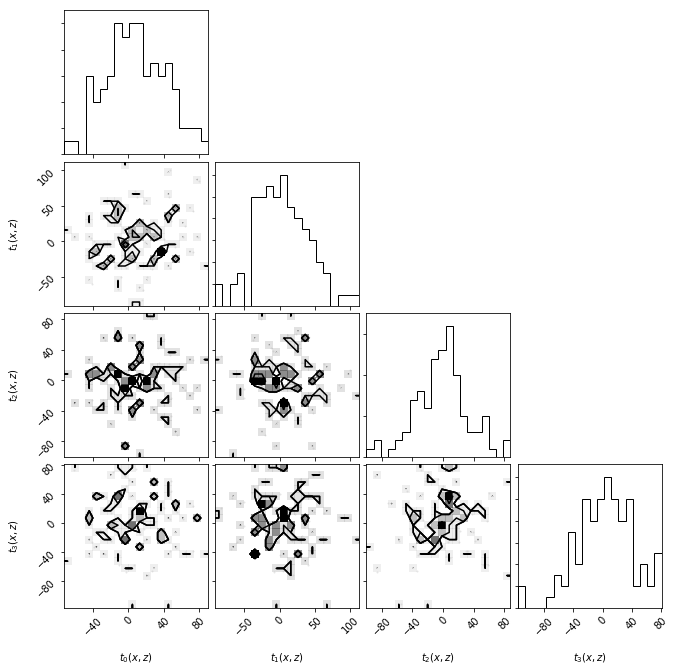

In [52]:
labels=[r'$t_' + str(i) + '(x,z)$' for i in range(4)]
_ = corner.corner(t_xz,labels=labels)

In [54]:
for i in range(4):
    mean = np.mean(t_xz[:,i])
    std = np.std(t_xz[:,i])
    
    print('t(x,z), component', i, ': mean =', mean, ', stddev =', std)

t(x,z), component 0 : mean = 9.032563432152708 , stddev = 33.53414525331417
t(x,z), component 1 : mean = 3.574508413011032 , stddev = 37.18606525075537
t(x,z), component 2 : mean = -1.7705297228220855 , stddev = 33.91199484238654
t(x,z), component 3 : mean = 3.112563432152717 , stddev = 38.85959754015401


## Relation between score and observables

4 parameters, 9 observables


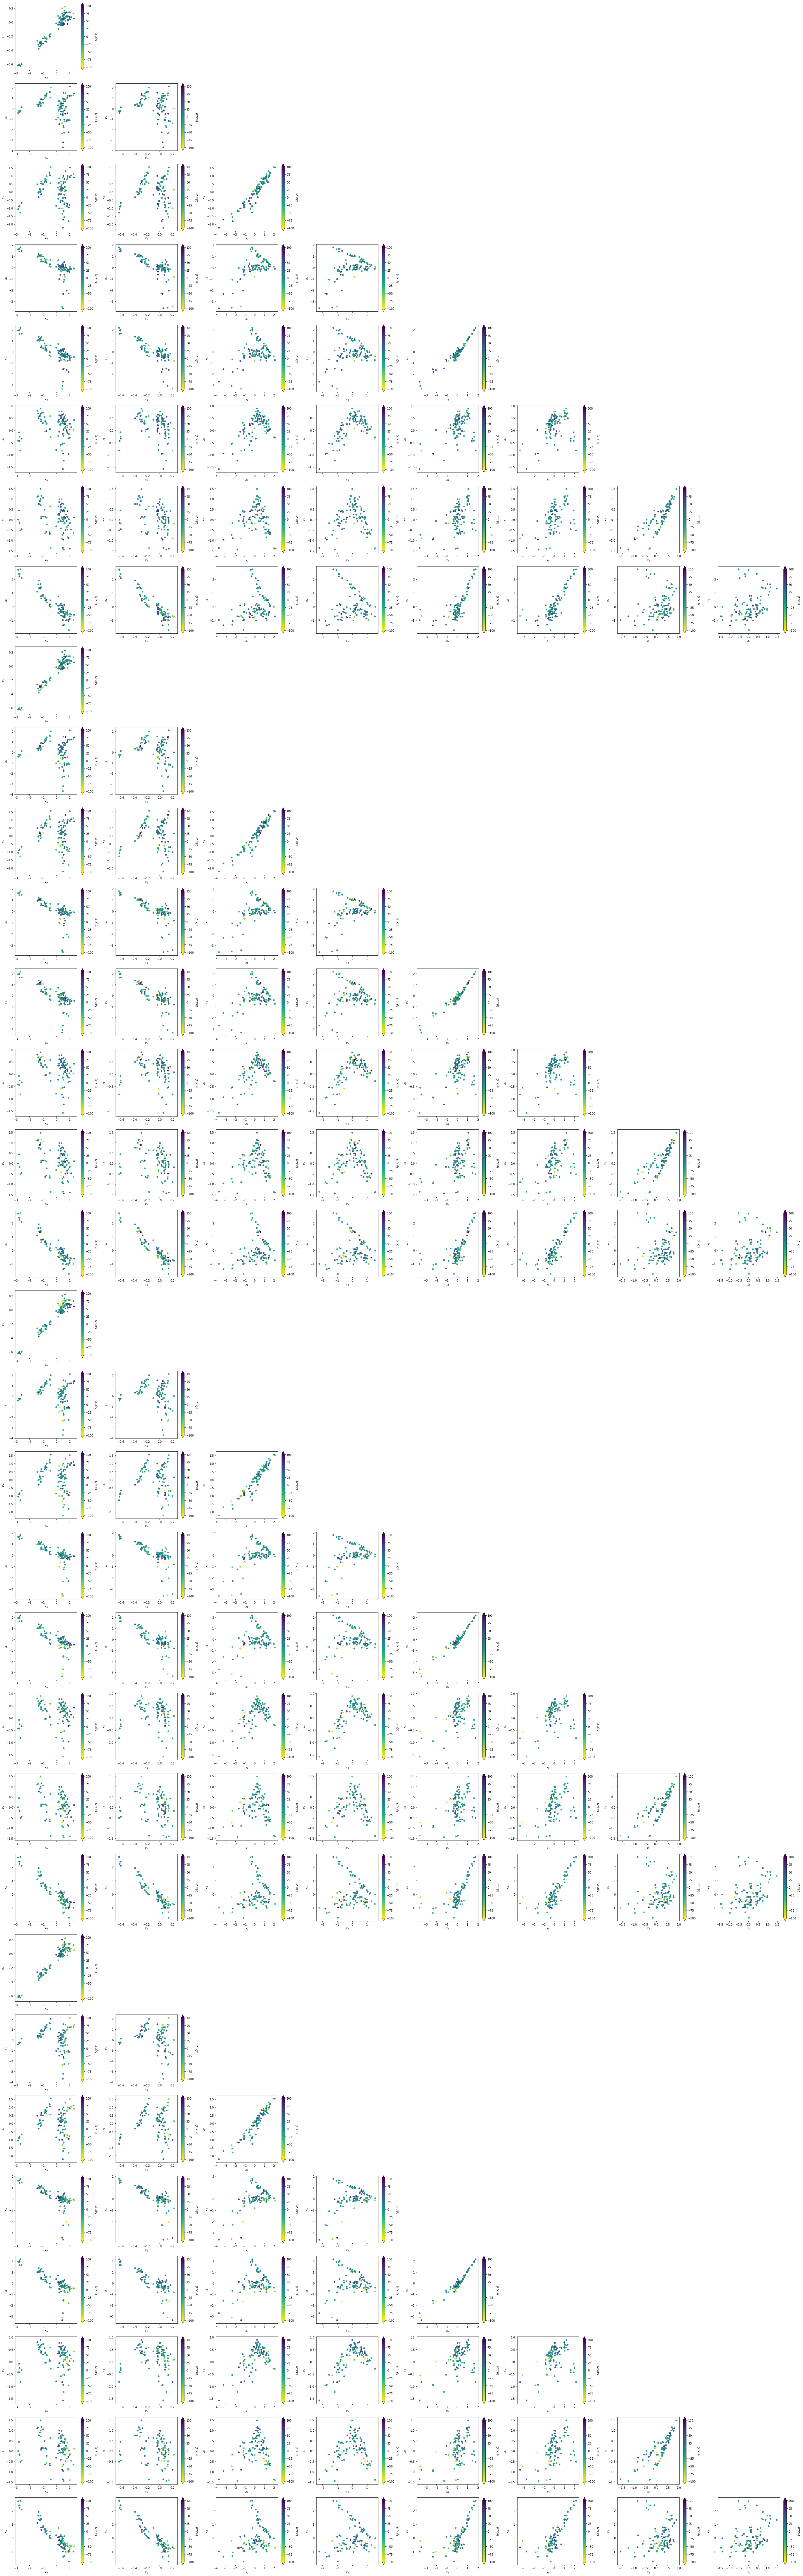

In [55]:
crange=-100.,100.
skip=1

n_parameters = t_xz.shape[1]
n_observables = x.shape[1]

print('{} parameters, {} observables'.format(n_parameters, n_observables))

n_x_panels = (n_observables - 1)
n_y_panels = (n_observables - 1) * n_parameters


fig = plt.figure(figsize=(n_x_panels * 5., n_y_panels * 4.))

for it in range(n_parameters):
    for iy in range(1, n_observables):
        for ix in range(0, iy):
            i_panel = 1 + (it * (n_observables - 1) + (iy - 1)) * n_x_panels + ix
            ax = plt.subplot(n_y_panels, n_x_panels, i_panel)

            sc = plt.scatter(x[::skip, ix], x[::skip, iy], c=t_xz[::skip,it], s=25.,
                             norm=matplotlib.colors.Normalize(vmin=crange[0], vmax=crange[1]), cmap='viridis_r')
            cbar = fig.colorbar(sc, ax=ax, extend='both')

            plt.xlabel(r'$x_' + str(ix) + '$')
            plt.ylabel(r'$x_' + str(iy) + '$')
            cbar.set_label(r'$t_' + str(it) + '(x,z)$')

plt.tight_layout()
plt.show()